In [1]:
import pandas as pd
pd.set_option('chained_assignment',None) # this allows the pandas apply function to work without problems. Should I double-check with Philipp?
import pickle

In [2]:
#concatenate all NYT dataframes
NYT_headlines_2020 = pd.read_csv('NYT_headlines_2020.csv')
NYT_headlines_2019 = pd.read_csv('NYT_headlines_2019.csv')
NYT_headlines_2018 = pd.read_csv('NYT_headlines_2018.csv')
NYT_headlines_2017 = pd.read_csv('NYT_headlines_2017.csv')
NYT_headlines_2016 = pd.read_csv('NYT_headlines_2016.csv')

NYT_headlines_2015 = pd.read_csv('NYT_headlines_2015.csv')
NYT_headlines_2014 = pd.read_csv('NYT_headlines_2014.csv')
NYT_headlines_2013 = pd.read_csv('NYT_headlines_2013.csv')
NYT_headlines_2012 = pd.read_csv('NYT_headlines_2012.csv')
NYT_headlines_2011 = pd.read_csv('NYT_headlines_2011.csv')
NYT_headlines_2010 = pd.read_csv('NYT_headlines_2010.csv')

In [3]:
NYT_headlines_2010['year']=2010
NYT_headlines_2011['year']=2011
NYT_headlines_2012['year']=2012
NYT_headlines_2013['year']=2013
NYT_headlines_2014['year']=2014
NYT_headlines_2015['year']=2015

NYT_headlines_2016['year']=2016
NYT_headlines_2017['year']=2017
NYT_headlines_2018['year']=2018
NYT_headlines_2019['year']=2019
NYT_headlines_2020['year']=2020


NYT_headlines_2015

,Unnamed: 0,0,month,year
0,0,They Knew What They Wanted,1,2015
1,1,Industrial Sleek,1,2015
2,2,The Imperfectionists,1,2015
3,3,A Simple Gift,1,2015
4,4,"Standouts in Tech: Drones, Virtual Reality, In...",1,2015
...,...,...,...,...
80247,6366,Gun-Friendly Texas Is Getting Even Friendlier,12,2015
80248,6367,‘Super PACs’ Supporting Ted Cruz Plan a $1 Mil...,12,2015
80249,6368,A Family in Transition Rebuilds Its Connections,12,2015
80250,6369,Chief Justice’s Report Praises Limits on Litig...,12,2015


In [4]:
NYT_all = pd.concat([NYT_headlines_2010,
          NYT_headlines_2011,
          NYT_headlines_2012,
          NYT_headlines_2013,
          NYT_headlines_2014,
          NYT_headlines_2015,
                     NYT_headlines_2016,
                     NYT_headlines_2017,
                     NYT_headlines_2018,
                     NYT_headlines_2019,
                     NYT_headlines_2020])


NYT_all = NYT_all.rename(columns={"0" : 'headline'})
NYT_all

,Unnamed: 0,headline,month,year
0,0,"A Camera and an Eye, Both One of a Kind",1,2010
1,1,Looking Ahead: Dance,1,2010
2,2,Chronicle of a Changing City,1,2010
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010
4,4,A Taxing Estate,1,2010
...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020


In [5]:
type(NYT_all.iloc[1].headline)

str

In [6]:
# tokenize with nltk before doing anything else

from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer()

def tokenize_headline(headline): 
    if type(headline) == str: #apparently some of them aren't strings...
        tokenized_headline = tweet_tokenizer.tokenize(headline)
        return tokenized_headline

NYT_all['tokenized_nltk'] = NYT_all.headline.apply(tokenize_headline)
NYT_all 

,Unnamed: 0,headline,month,year,tokenized_nltk
0,0,"A Camera and an Eye, Both One of a Kind",1,2010,"[A, Camera, and, an, Eye, ,, Both, One, of, a,..."
1,1,Looking Ahead: Dance,1,2010,"[Looking, Ahead, :, Dance]"
2,2,Chronicle of a Changing City,1,2010,"[Chronicle, of, a, Changing, City]"
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te..."
4,4,A Taxing Estate,1,2010,"[A, Taxing, Estate]"
...,...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T..."
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020,"[Some, recipe, ideas, for, a, New, Year, ’, s,..."
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020,"[Microsoft, Says, Russian, Hackers, Viewed, So..."
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,..."


In [7]:
NYT_all = NYT_all.dropna() # used to be 571859, now it's 571845. not a loss

In [8]:
# in all following steps lowercase and remove punctuation

import string 
string.punctuation

def nltk_remove_punct_and_lowercase(text): 
    lower = [token.lower() for token in text]
    no_punctuation = [token for token in lower if token not in string.punctuation] 
    return no_punctuation

NYT_all['lower_words_nltk'] = NYT_all.tokenized_nltk.apply(nltk_remove_punct_and_lowercase)
# I call this lower_words, instead of tokens because it's just the words, excluding the punctuation, and because it's lowercased
# nltk because I've used the nltk tokenizer

NYT_all

,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk
0,0,"A Camera and an Eye, Both One of a Kind",1,2010,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","[a, camera, and, an, eye, both, one, of, a, kind]"
1,1,Looking Ahead: Dance,1,2010,"[Looking, Ahead, :, Dance]","[looking, ahead, dance]"
2,2,Chronicle of a Changing City,1,2010,"[Chronicle, of, a, Changing, City]","[chronicle, of, a, changing, city]"
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...","[chick-fil-a, bowl, no, 11, virginia, tech, 9-..."
4,4,A Taxing Estate,1,2010,"[A, Taxing, Estate]","[a, taxing, estate]"
...,...,...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","[‘, ratatouille, ’, the, musical, how, this, t..."
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020,"[Some, recipe, ideas, for, a, New, Year, ’, s,...","[some, recipe, ideas, for, a, new, year, ’, s,..."
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020,"[Microsoft, Says, Russian, Hackers, Viewed, So...","[microsoft, says, russian, hackers, viewed, so..."
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...","[new, in, paperback, ‘, the, red, lotus, ’, an..."


In [9]:
# get headline length

NYT_all['lower_words_nltk_n'] = NYT_all['lower_words_nltk'].apply(len)
NYT_all

,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n
0,0,"A Camera and an Eye, Both One of a Kind",1,2010,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","[a, camera, and, an, eye, both, one, of, a, kind]",10
1,1,Looking Ahead: Dance,1,2010,"[Looking, Ahead, :, Dance]","[looking, ahead, dance]",3
2,2,Chronicle of a Changing City,1,2010,"[Chronicle, of, a, Changing, City]","[chronicle, of, a, changing, city]",5
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...","[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",10
4,4,A Taxing Estate,1,2010,"[A, Taxing, Estate]","[a, taxing, estate]",3
...,...,...,...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","[‘, ratatouille, ’, the, musical, how, this, t...",11
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020,"[Some, recipe, ideas, for, a, New, Year, ’, s,...","[some, recipe, ideas, for, a, new, year, ’, s,...",12
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020,"[Microsoft, Says, Russian, Hackers, Viewed, So...","[microsoft, says, russian, hackers, viewed, so...",10
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...","[new, in, paperback, ‘, the, red, lotus, ’, an...",14


In [10]:
NYT_all[NYT_all['lower_words_nltk_n'] == 0] #three rows contain zero words, delete themb

,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n
72299,4728,,8,2010,[],[],0
96254,1789,.,12,2011,[.],[],0
44475,4034,.,7,2015,[.],[],0


In [11]:
# get number of characters

NYT_all['char_n'] = NYT_all['headline'].apply(len)
NYT_all

,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n,char_n
0,0,"A Camera and an Eye, Both One of a Kind",1,2010,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","[a, camera, and, an, eye, both, one, of, a, kind]",10,39
1,1,Looking Ahead: Dance,1,2010,"[Looking, Ahead, :, Dance]","[looking, ahead, dance]",3,20
2,2,Chronicle of a Changing City,1,2010,"[Chronicle, of, a, Changing, City]","[chronicle, of, a, changing, city]",5,28
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...","[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",10,64
4,4,A Taxing Estate,1,2010,"[A, Taxing, Estate]","[a, taxing, estate]",3,15
...,...,...,...,...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","[‘, ratatouille, ’, the, musical, how, this, t...",11,66
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020,"[Some, recipe, ideas, for, a, New, Year, ’, s,...","[some, recipe, ideas, for, a, new, year, ’, s,...",12,47
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020,"[Microsoft, Says, Russian, Hackers, Viewed, So...","[microsoft, says, russian, hackers, viewed, so...",10,61
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...","[new, in, paperback, ‘, the, red, lotus, ’, an...",14,51


In [12]:
NYT_all = NYT_all[NYT_all.lower_words_nltk_n != 0]

In [13]:
# get average word length

def get_average_word_length(tokens):
    lengths = [len(token) for token in tokens]
    avg_word_length = sum(lengths) / len(tokens)
    return avg_word_length

NYT_all['lower_words_nltk_mean_len'] = NYT_all.lower_words_nltk.apply(get_average_word_length)
NYT_all

#lower_words_nltk_mean_len seems like a bit of a mouthful
#lowe_words_nltk just means lowercased words as tokenized by nltk, mean len if obv
# this could just be mean word length

,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n,char_n,lower_words_nltk_mean_len
0,0,"A Camera and an Eye, Both One of a Kind",1,2010,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","[a, camera, and, an, eye, both, one, of, a, kind]",10,39,2.900000
1,1,Looking Ahead: Dance,1,2010,"[Looking, Ahead, :, Dance]","[looking, ahead, dance]",3,20,5.666667
2,2,Chronicle of a Changing City,1,2010,"[Chronicle, of, a, Changing, City]","[chronicle, of, a, changing, city]",5,28,4.800000
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...","[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",10,64,4.800000
4,4,A Taxing Estate,1,2010,"[A, Taxing, Estate]","[a, taxing, estate]",3,15,4.333333
...,...,...,...,...,...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","[‘, ratatouille, ’, the, musical, how, this, t...",11,66,5.090909
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020,"[Some, recipe, ideas, for, a, New, Year, ’, s,...","[some, recipe, ideas, for, a, new, year, ’, s,...",12,47,3.083333
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020,"[Microsoft, Says, Russian, Hackers, Viewed, So...","[microsoft, says, russian, hackers, viewed, so...",10,61,5.200000
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...","[new, in, paperback, ‘, the, red, lotus, ’, an...",14,51,2.928571


In [14]:
# count sentences

# tokenize the raw text into sentences
from nltk import sent_tokenize

def count_sentences(headline):
    return len(sent_tokenize(headline))

NYT_all['sents'] = NYT_all.headline.apply(count_sentences)
NYT_all

,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n,char_n,lower_words_nltk_mean_len,sents
0,0,"A Camera and an Eye, Both One of a Kind",1,2010,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","[a, camera, and, an, eye, both, one, of, a, kind]",10,39,2.900000,1
1,1,Looking Ahead: Dance,1,2010,"[Looking, Ahead, :, Dance]","[looking, ahead, dance]",3,20,5.666667,1
2,2,Chronicle of a Changing City,1,2010,"[Chronicle, of, a, Changing, City]","[chronicle, of, a, changing, city]",5,28,4.800000,1
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...","[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",10,64,4.800000,2
4,4,A Taxing Estate,1,2010,"[A, Taxing, Estate]","[a, taxing, estate]",3,15,4.333333,1
...,...,...,...,...,...,...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","[‘, ratatouille, ’, the, musical, how, this, t...",11,66,5.090909,1
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020,"[Some, recipe, ideas, for, a, New, Year, ’, s,...","[some, recipe, ideas, for, a, new, year, ’, s,...",12,47,3.083333,1
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020,"[Microsoft, Says, Russian, Hackers, Viewed, So...","[microsoft, says, russian, hackers, viewed, so...",10,61,5.200000,1
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...","[new, in, paperback, ‘, the, red, lotus, ’, an...",14,51,2.928571,1


In [15]:
# count stop words with nltk

from nltk.corpus import stopwords

nltk_stopwords = set(stopwords.words('english')) #get the stopwords as a set, makes checking quicker

def count_nltk_stopwords(headline): 
    stopwords = [token for token in headline if token in nltk_stopwords]
    return len(stopwords)


NYT_all['nltk_stopwords_n'] = NYT_all.lower_words_nltk.apply(count_nltk_stopwords)
NYT_all

,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n,char_n,lower_words_nltk_mean_len,sents,nltk_stopwords_n
0,0,"A Camera and an Eye, Both One of a Kind",1,2010,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","[a, camera, and, an, eye, both, one, of, a, kind]",10,39,2.900000,1,6
1,1,Looking Ahead: Dance,1,2010,"[Looking, Ahead, :, Dance]","[looking, ahead, dance]",3,20,5.666667,1,0
2,2,Chronicle of a Changing City,1,2010,"[Chronicle, of, a, Changing, City]","[chronicle, of, a, changing, city]",5,28,4.800000,1,2
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...","[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",10,64,4.800000,2,1
4,4,A Taxing Estate,1,2010,"[A, Taxing, Estate]","[a, taxing, estate]",3,15,4.333333,1,1
...,...,...,...,...,...,...,...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","[‘, ratatouille, ’, the, musical, how, this, t...",11,66,5.090909,1,3
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020,"[Some, recipe, ideas, for, a, New, Year, ’, s,...","[some, recipe, ideas, for, a, new, year, ’, s,...",12,47,3.083333,1,5
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020,"[Microsoft, Says, Russian, Hackers, Viewed, So...","[microsoft, says, russian, hackers, viewed, so...",10,61,5.200000,1,3
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...","[new, in, paperback, ‘, the, red, lotus, ’, an...",14,51,2.928571,1,5


In [16]:
# get stop word ratio

NYT_all['nltk_stopwords_ratio'] = NYT_all.nltk_stopwords_n / NYT_all.lower_words_nltk_n 
NYT_all

,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n,char_n,lower_words_nltk_mean_len,sents,nltk_stopwords_n,nltk_stopwords_ratio
0,0,"A Camera and an Eye, Both One of a Kind",1,2010,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","[a, camera, and, an, eye, both, one, of, a, kind]",10,39,2.900000,1,6,0.600000
1,1,Looking Ahead: Dance,1,2010,"[Looking, Ahead, :, Dance]","[looking, ahead, dance]",3,20,5.666667,1,0,0.000000
2,2,Chronicle of a Changing City,1,2010,"[Chronicle, of, a, Changing, City]","[chronicle, of, a, changing, city]",5,28,4.800000,1,2,0.400000
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...","[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",10,64,4.800000,2,1,0.100000
4,4,A Taxing Estate,1,2010,"[A, Taxing, Estate]","[a, taxing, estate]",3,15,4.333333,1,1,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","[‘, ratatouille, ’, the, musical, how, this, t...",11,66,5.090909,1,3,0.272727
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020,"[Some, recipe, ideas, for, a, New, Year, ’, s,...","[some, recipe, ideas, for, a, new, year, ’, s,...",12,47,3.083333,1,5,0.416667
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020,"[Microsoft, Says, Russian, Hackers, Viewed, So...","[microsoft, says, russian, hackers, viewed, so...",10,61,5.200000,1,3,0.300000
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...","[new, in, paperback, ‘, the, red, lotus, ’, an...",14,51,2.928571,1,5,0.357143


In [17]:
# count Reader-Adressing pronouns

reader_adressing_pronouns = ["you", "you're", "you'd", "you'll", "your", "yours"]
reader_adressing_pronouns = set(reader_adressing_pronouns)

def count_reader_adressing_pronouns(headline): 
    tokenized_headline = tweet_tokenizer.tokenize(headline)
    lower = [token.lower() for token in tokenized_headline]
    raps = [token for token in lower if token in reader_adressing_pronouns]
    return len(raps)


NYT_all['raps_n'] = NYT_all.headline.apply(count_reader_adressing_pronouns)
NYT_all

,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n,char_n,lower_words_nltk_mean_len,sents,nltk_stopwords_n,nltk_stopwords_ratio,raps_n
0,0,"A Camera and an Eye, Both One of a Kind",1,2010,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","[a, camera, and, an, eye, both, one, of, a, kind]",10,39,2.900000,1,6,0.600000,0
1,1,Looking Ahead: Dance,1,2010,"[Looking, Ahead, :, Dance]","[looking, ahead, dance]",3,20,5.666667,1,0,0.000000,0
2,2,Chronicle of a Changing City,1,2010,"[Chronicle, of, a, Changing, City]","[chronicle, of, a, changing, city]",5,28,4.800000,1,2,0.400000,0
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...","[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",10,64,4.800000,2,1,0.100000,0
4,4,A Taxing Estate,1,2010,"[A, Taxing, Estate]","[a, taxing, estate]",3,15,4.333333,1,1,0.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","[‘, ratatouille, ’, the, musical, how, this, t...",11,66,5.090909,1,3,0.272727,0
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020,"[Some, recipe, ideas, for, a, New, Year, ’, s,...","[some, recipe, ideas, for, a, new, year, ’, s,...",12,47,3.083333,1,5,0.416667,0
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020,"[Microsoft, Says, Russian, Hackers, Viewed, So...","[microsoft, says, russian, hackers, viewed, so...",10,61,5.200000,1,3,0.300000,0
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...","[new, in, paperback, ‘, the, red, lotus, ’, an...",14,51,2.928571,1,5,0.357143,0


In [18]:
NYT_all.headline.tail()

55488    ‘Ratatouille,’ the Musical: How This TikTok Cr...
55489      Some recipe ideas for a New Year’s Eve at home.
55490    Microsoft Says Russian Hackers Viewed Some of ...
55491    New in Paperback: ‘The Red Lotus’ and ‘This Is...
55492              The World Begins Saying Goodbye to 2020
Name: headline, dtype: object

In [19]:
# get first_person_sg

first_person_sg_pronouns = ["i", "i'm", "i'd", "i'll", "my", "me", "mine"]
first_person_sg_pronouns = set(first_person_sg_pronouns)

def get_first_person_sg(headline_as_words): 
    first_person_sg = [token for token in headline_as_words if token in first_person_sg_pronouns]
    return len(first_person_sg)


NYT_all['first_person_sg'] = NYT_all.lower_words_nltk.apply(get_first_person_sg)
NYT_all

,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n,char_n,lower_words_nltk_mean_len,sents,nltk_stopwords_n,nltk_stopwords_ratio,raps_n,first_person_sg
0,0,"A Camera and an Eye, Both One of a Kind",1,2010,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","[a, camera, and, an, eye, both, one, of, a, kind]",10,39,2.900000,1,6,0.600000,0,0
1,1,Looking Ahead: Dance,1,2010,"[Looking, Ahead, :, Dance]","[looking, ahead, dance]",3,20,5.666667,1,0,0.000000,0,0
2,2,Chronicle of a Changing City,1,2010,"[Chronicle, of, a, Changing, City]","[chronicle, of, a, changing, city]",5,28,4.800000,1,2,0.400000,0,0
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...","[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",10,64,4.800000,2,1,0.100000,0,0
4,4,A Taxing Estate,1,2010,"[A, Taxing, Estate]","[a, taxing, estate]",3,15,4.333333,1,1,0.333333,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","[‘, ratatouille, ’, the, musical, how, this, t...",11,66,5.090909,1,3,0.272727,0,0
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020,"[Some, recipe, ideas, for, a, New, Year, ’, s,...","[some, recipe, ideas, for, a, new, year, ’, s,...",12,47,3.083333,1,5,0.416667,0,0
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020,"[Microsoft, Says, Russian, Hackers, Viewed, So...","[microsoft, says, russian, hackers, viewed, so...",10,61,5.200000,1,3,0.300000,0,0
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...","[new, in, paperback, ‘, the, red, lotus, ’, an...",14,51,2.928571,1,5,0.357143,0,0


In [20]:
# get first_person_pl

first_person_pl_pronouns = ["we", "we're", "we'd", "we'll", "our", "us", "ours"]
first_person_pl_pronouns = set(first_person_pl_pronouns)

def get_first_person_pl(headline_as_words): 
    first_person_pl = [token for token in headline_as_words if token in first_person_pl_pronouns]
    return len(first_person_pl)


NYT_all['first_person_pl'] = NYT_all.lower_words_nltk.apply(get_first_person_pl)
NYT_all

,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n,char_n,lower_words_nltk_mean_len,sents,nltk_stopwords_n,nltk_stopwords_ratio,raps_n,first_person_sg,first_person_pl
0,0,"A Camera and an Eye, Both One of a Kind",1,2010,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","[a, camera, and, an, eye, both, one, of, a, kind]",10,39,2.900000,1,6,0.600000,0,0,0
1,1,Looking Ahead: Dance,1,2010,"[Looking, Ahead, :, Dance]","[looking, ahead, dance]",3,20,5.666667,1,0,0.000000,0,0,0
2,2,Chronicle of a Changing City,1,2010,"[Chronicle, of, a, Changing, City]","[chronicle, of, a, changing, city]",5,28,4.800000,1,2,0.400000,0,0,0
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...","[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",10,64,4.800000,2,1,0.100000,0,0,0
4,4,A Taxing Estate,1,2010,"[A, Taxing, Estate]","[a, taxing, estate]",3,15,4.333333,1,1,0.333333,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","[‘, ratatouille, ’, the, musical, how, this, t...",11,66,5.090909,1,3,0.272727,0,0,0
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020,"[Some, recipe, ideas, for, a, New, Year, ’, s,...","[some, recipe, ideas, for, a, new, year, ’, s,...",12,47,3.083333,1,5,0.416667,0,0,0
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020,"[Microsoft, Says, Russian, Hackers, Viewed, So...","[microsoft, says, russian, hackers, viewed, so...",10,61,5.200000,1,3,0.300000,0,0,0
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...","[new, in, paperback, ‘, the, red, lotus, ’, an...",14,51,2.928571,1,5,0.357143,0,0,0


In [21]:
# get future forms

future_forms = ["will", "won't", "i'll", "you'll", "he'll", "she'll", "it'll", "we'll"]
future_forms = set(future_forms)

def get_future_forms(headline_as_words): 
    future_occurrence = [token for token in headline_as_words if token in future_forms]
    return len(future_occurrence)


NYT_all['future'] = NYT_all.lower_words_nltk.apply(get_future_forms)
NYT_all

,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n,char_n,lower_words_nltk_mean_len,sents,nltk_stopwords_n,nltk_stopwords_ratio,raps_n,first_person_sg,first_person_pl,future
0,0,"A Camera and an Eye, Both One of a Kind",1,2010,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","[a, camera, and, an, eye, both, one, of, a, kind]",10,39,2.900000,1,6,0.600000,0,0,0,0
1,1,Looking Ahead: Dance,1,2010,"[Looking, Ahead, :, Dance]","[looking, ahead, dance]",3,20,5.666667,1,0,0.000000,0,0,0,0
2,2,Chronicle of a Changing City,1,2010,"[Chronicle, of, a, Changing, City]","[chronicle, of, a, changing, city]",5,28,4.800000,1,2,0.400000,0,0,0,0
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...","[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",10,64,4.800000,2,1,0.100000,0,0,0,0
4,4,A Taxing Estate,1,2010,"[A, Taxing, Estate]","[a, taxing, estate]",3,15,4.333333,1,1,0.333333,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","[‘, ratatouille, ’, the, musical, how, this, t...",11,66,5.090909,1,3,0.272727,0,0,0,0
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020,"[Some, recipe, ideas, for, a, New, Year, ’, s,...","[some, recipe, ideas, for, a, new, year, ’, s,...",12,47,3.083333,1,5,0.416667,0,0,0,0
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020,"[Microsoft, Says, Russian, Hackers, Viewed, So...","[microsoft, says, russian, hackers, viewed, so...",10,61,5.200000,1,3,0.300000,0,0,0,0
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...","[new, in, paperback, ‘, the, red, lotus, ’, an...",14,51,2.928571,1,5,0.357143,0,0,0,0


In [22]:
# get all part of speech, both as count and as ratio

import nltk 
def get_pos_tags(tokens):
    
    pos_tags = nltk.pos_tag(tokens)
    # only_pos_tag = [pos_tag[1] for pos_tag in pos_tags] #this would only get the pos_tag withohut the associated word
    return pos_tags # or only_pos_tag

NYT_all['pos_tags_word_level'] = NYT_all.lower_words_nltk.apply(get_pos_tags)
NYT_all


# some_pos_tags1 = get_pos_tags(upworthy_cleaned.tokenized_nltk.iloc[0])
# some_pos_tags1

# some_pos_tags2 = get_pos_tags(upworthy_cleaned.lower_words_nltk.iloc[0])
# some_pos_tags2 #weirdly, this works better, even though it's on the lower_words without punctuation

,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n,char_n,lower_words_nltk_mean_len,sents,nltk_stopwords_n,nltk_stopwords_ratio,raps_n,first_person_sg,first_person_pl,future,pos_tags_word_level
0,0,"A Camera and an Eye, Both One of a Kind",1,2010,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","[a, camera, and, an, eye, both, one, of, a, kind]",10,39,2.900000,1,6,0.600000,0,0,0,0,"[(a, DT), (camera, NN), (and, CC), (an, DT), (..."
1,1,Looking Ahead: Dance,1,2010,"[Looking, Ahead, :, Dance]","[looking, ahead, dance]",3,20,5.666667,1,0,0.000000,0,0,0,0,"[(looking, VBG), (ahead, RB), (dance, NN)]"
2,2,Chronicle of a Changing City,1,2010,"[Chronicle, of, a, Changing, City]","[chronicle, of, a, changing, city]",5,28,4.800000,1,2,0.400000,0,0,0,0,"[(chronicle, NN), (of, IN), (a, DT), (changing..."
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...","[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",10,64,4.800000,2,1,0.100000,0,0,0,0,"[(chick-fil-a, JJ), (bowl, NN), (no, DT), (11,..."
4,4,A Taxing Estate,1,2010,"[A, Taxing, Estate]","[a, taxing, estate]",3,15,4.333333,1,1,0.333333,0,0,0,0,"[(a, DT), (taxing, NN), (estate, NN)]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","[‘, ratatouille, ’, the, musical, how, this, t...",11,66,5.090909,1,3,0.272727,0,0,0,0,"[(‘, JJ), (ratatouille, NN), (’, VBD), (the, D..."
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020,"[Some, recipe, ideas, for, a, New, Year, ’, s,...","[some, recipe, ideas, for, a, new, year, ’, s,...",12,47,3.083333,1,5,0.416667,0,0,0,0,"[(some, DT), (recipe, NN), (ideas, NNS), (for,..."
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020,"[Microsoft, Says, Russian, Hackers, Viewed, So...","[microsoft, says, russian, hackers, viewed, so...",10,61,5.200000,1,3,0.300000,0,0,0,0,"[(microsoft, NN), (says, VBZ), (russian, JJ), ..."
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...","[new, in, paperback, ‘, the, red, lotus, ’, an...",14,51,2.928571,1,5,0.357143,0,0,0,0,"[(new, JJ), (in, IN), (paperback, NN), (‘, IN)..."


In [23]:
def get_nouns(pos_tags):
    nouns = [pos_tag[0] for pos_tag in pos_tags if pos_tag[1].startswith('N')]
    return nouns

def get_pronouns(pos_tags):
    pronouns = [pos_tag[0] for pos_tag in pos_tags if pos_tag[1].startswith('PRP')]
    return pronouns

def get_verbs(pos_tags):
    verbs = [pos_tag[0] for pos_tag in pos_tags if pos_tag[1].startswith('V')]
    return verbs
    
def get_adjs(pos_tags):
    adjs = [pos_tag[0] for pos_tag in pos_tags if pos_tag[1].startswith('J')]
    return adjs 

def get_advs(pos_tags):
    advs = [pos_tag[0] for pos_tag in pos_tags if pos_tag[1].startswith('R')]
    return advs
      
def get_superlatives(pos_tags):    
    superlatives = [pos_tag[0] for pos_tag in pos_tags if pos_tag[1] == 'JJS'or pos_tag[1] == 'RBS'] # adjective and adverbial superlative 
    return superlatives 

def get_w_words(pos_tags):
    w_words = [pos_tag[0] for pos_tag in pos_tags if pos_tag[1].startswith('W')]
    return w_words

def get_interjections(pos_tags):
    interjections = [pos_tag[0] for pos_tag in pos_tags if pos_tag[1] == 'UH']
    return interjections

def get_dets(pos_tags):
    dets = [pos_tag[0] for pos_tag in pos_tags if pos_tag[1] == 'DT']
    return dets

demonstratives = ['this', 'that', 'these', 'those']
demonstratives = set(demonstratives)
def get_dems(words):
    dems = [word for word in words if word in demonstratives]
    return len(dems)

# determiners are not informative, since they include articles. 
# demonstrativves could be more informative, indicating cataphora. 

NYT_all['nouns'] = NYT_all['pos_tags_word_level'].apply(get_nouns)

NYT_all['pronouns'] = NYT_all['pos_tags_word_level'].apply(get_pronouns)

NYT_all['verbs'] = NYT_all['pos_tags_word_level'].apply(get_verbs)

NYT_all['adjs'] = NYT_all['pos_tags_word_level'].apply(get_adjs)

NYT_all['advs'] = NYT_all['pos_tags_word_level'].apply(get_advs)

NYT_all['superlatives'] = NYT_all['pos_tags_word_level'].apply(get_superlatives)

NYT_all['w_words'] = NYT_all['pos_tags_word_level'].apply(get_w_words)

NYT_all['dems'] = NYT_all.lower_words_nltk.apply(get_dems)

NYT_all

,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n,char_n,lower_words_nltk_mean_len,sents,...,future,pos_tags_word_level,nouns,pronouns,verbs,adjs,advs,superlatives,w_words,dems
0,0,"A Camera and an Eye, Both One of a Kind",1,2010,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","[a, camera, and, an, eye, both, one, of, a, kind]",10,39,2.900000,1,...,0,"[(a, DT), (camera, NN), (and, CC), (an, DT), (...","[camera, eye, kind]",[],[],[],[],[],[],0
1,1,Looking Ahead: Dance,1,2010,"[Looking, Ahead, :, Dance]","[looking, ahead, dance]",3,20,5.666667,1,...,0,"[(looking, VBG), (ahead, RB), (dance, NN)]",[dance],[],[looking],[],[ahead],[],[],0
2,2,Chronicle of a Changing City,1,2010,"[Chronicle, of, a, Changing, City]","[chronicle, of, a, changing, city]",5,28,4.800000,1,...,0,"[(chronicle, NN), (of, IN), (a, DT), (changing...","[chronicle, city]",[],[changing],[],[],[],[],0
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...","[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",10,64,4.800000,2,...,0,"[(chick-fil-a, JJ), (bowl, NN), (no, DT), (11,...","[bowl, virginia, tennessee]",[],[],"[chick-fil-a, tech, vs, 7-5]",[],[],[],0
4,4,A Taxing Estate,1,2010,"[A, Taxing, Estate]","[a, taxing, estate]",3,15,4.333333,1,...,0,"[(a, DT), (taxing, NN), (estate, NN)]","[taxing, estate]",[],[],[],[],[],[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","[‘, ratatouille, ’, the, musical, how, this, t...",11,66,5.090909,1,...,0,"[(‘, JJ), (ratatouille, NN), (’, VBD), (the, D...","[ratatouille, creation]",[],"[’, came]","[‘, musical, tiktok]",[together],[],[how],1
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020,"[Some, recipe, ideas, for, a, New, Year, ’, s,...","[some, recipe, ideas, for, a, new, year, ’, s,...",12,47,3.083333,1,...,0,"[(some, DT), (recipe, NN), (ideas, NNS), (for,...","[recipe, ideas, year, ’, s, home]",[],[eve],[new],[],[],[],0
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020,"[Microsoft, Says, Russian, Hackers, Viewed, So...","[microsoft, says, russian, hackers, viewed, so...",10,61,5.200000,1,...,0,"[(microsoft, NN), (says, VBZ), (russian, JJ), ...","[microsoft, hackers, source, code]",[its],"[says, viewed]",[russian],[],[],[],0
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...","[new, in, paperback, ‘, the, red, lotus, ’, an...",14,51,2.928571,1,...,0,"[(new, JJ), (in, IN), (paperback, NN), (‘, IN)...","[paperback, lotus, ’, ’]",[],"[‘, is]","[new, red, big]",[],[],[],1


In [24]:
lexical_classes = ['nouns', 'pronouns', 'verbs' ,'adjs', 'advs', 'superlatives', 'w_words']

for lexical_class in lexical_classes:
    NYT_all[lexical_class +'_n'] = NYT_all[lexical_class].apply(len)
    
NYT_all

,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n,char_n,lower_words_nltk_mean_len,sents,...,superlatives,w_words,dems,nouns_n,pronouns_n,verbs_n,adjs_n,advs_n,superlatives_n,w_words_n
0,0,"A Camera and an Eye, Both One of a Kind",1,2010,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","[a, camera, and, an, eye, both, one, of, a, kind]",10,39,2.900000,1,...,[],[],0,3,0,0,0,0,0,0
1,1,Looking Ahead: Dance,1,2010,"[Looking, Ahead, :, Dance]","[looking, ahead, dance]",3,20,5.666667,1,...,[],[],0,1,0,1,0,1,0,0
2,2,Chronicle of a Changing City,1,2010,"[Chronicle, of, a, Changing, City]","[chronicle, of, a, changing, city]",5,28,4.800000,1,...,[],[],0,2,0,1,0,0,0,0
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...","[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",10,64,4.800000,2,...,[],[],0,3,0,0,4,0,0,0
4,4,A Taxing Estate,1,2010,"[A, Taxing, Estate]","[a, taxing, estate]",3,15,4.333333,1,...,[],[],0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","[‘, ratatouille, ’, the, musical, how, this, t...",11,66,5.090909,1,...,[],[how],1,2,0,2,3,1,0,1
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020,"[Some, recipe, ideas, for, a, New, Year, ’, s,...","[some, recipe, ideas, for, a, new, year, ’, s,...",12,47,3.083333,1,...,[],[],0,6,0,1,1,0,0,0
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020,"[Microsoft, Says, Russian, Hackers, Viewed, So...","[microsoft, says, russian, hackers, viewed, so...",10,61,5.200000,1,...,[],[],0,4,1,2,1,0,0,0
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...","[new, in, paperback, ‘, the, red, lotus, ’, an...",14,51,2.928571,1,...,[],[],1,4,0,2,3,0,0,0


In [25]:
lexical_classes = ['nouns', 'pronouns', 'verbs' ,'adjs', 'advs', 'superlatives', 'w_words']

for lexical_class in lexical_classes:
    NYT_all[lexical_class +'_ratio'] = NYT_all[lexical_class + '_n'] / NYT_all['lower_words_nltk_n']
    
NYT_all

,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n,char_n,lower_words_nltk_mean_len,sents,...,advs_n,superlatives_n,w_words_n,nouns_ratio,pronouns_ratio,verbs_ratio,adjs_ratio,advs_ratio,superlatives_ratio,w_words_ratio
0,0,"A Camera and an Eye, Both One of a Kind",1,2010,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","[a, camera, and, an, eye, both, one, of, a, kind]",10,39,2.900000,1,...,0,0,0,0.300000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,1,Looking Ahead: Dance,1,2010,"[Looking, Ahead, :, Dance]","[looking, ahead, dance]",3,20,5.666667,1,...,1,0,0,0.333333,0.0,0.333333,0.000000,0.333333,0.0,0.000000
2,2,Chronicle of a Changing City,1,2010,"[Chronicle, of, a, Changing, City]","[chronicle, of, a, changing, city]",5,28,4.800000,1,...,0,0,0,0.400000,0.0,0.200000,0.000000,0.000000,0.0,0.000000
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...","[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",10,64,4.800000,2,...,0,0,0,0.300000,0.0,0.000000,0.400000,0.000000,0.0,0.000000
4,4,A Taxing Estate,1,2010,"[A, Taxing, Estate]","[a, taxing, estate]",3,15,4.333333,1,...,0,0,0,0.666667,0.0,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","[‘, ratatouille, ’, the, musical, how, this, t...",11,66,5.090909,1,...,1,0,1,0.181818,0.0,0.181818,0.272727,0.090909,0.0,0.090909
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020,"[Some, recipe, ideas, for, a, New, Year, ’, s,...","[some, recipe, ideas, for, a, new, year, ’, s,...",12,47,3.083333,1,...,0,0,0,0.500000,0.0,0.083333,0.083333,0.000000,0.0,0.000000
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020,"[Microsoft, Says, Russian, Hackers, Viewed, So...","[microsoft, says, russian, hackers, viewed, so...",10,61,5.200000,1,...,0,0,0,0.400000,0.1,0.200000,0.100000,0.000000,0.0,0.000000
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...","[new, in, paperback, ‘, the, red, lotus, ’, an...",14,51,2.928571,1,...,0,0,0,0.285714,0.0,0.142857,0.214286,0.000000,0.0,0.000000


In [26]:
# get first pos-tag per headline

def get_first_pos_tag(pos_tags):
    return pos_tags[0][1]
    
NYT_all['first_pos_tag'] = NYT_all['pos_tags_word_level'].apply(get_first_pos_tag)
NYT_all

,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n,char_n,lower_words_nltk_mean_len,sents,...,superlatives_n,w_words_n,nouns_ratio,pronouns_ratio,verbs_ratio,adjs_ratio,advs_ratio,superlatives_ratio,w_words_ratio,first_pos_tag
0,0,"A Camera and an Eye, Both One of a Kind",1,2010,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","[a, camera, and, an, eye, both, one, of, a, kind]",10,39,2.900000,1,...,0,0,0.300000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,DT
1,1,Looking Ahead: Dance,1,2010,"[Looking, Ahead, :, Dance]","[looking, ahead, dance]",3,20,5.666667,1,...,0,0,0.333333,0.0,0.333333,0.000000,0.333333,0.0,0.000000,VBG
2,2,Chronicle of a Changing City,1,2010,"[Chronicle, of, a, Changing, City]","[chronicle, of, a, changing, city]",5,28,4.800000,1,...,0,0,0.400000,0.0,0.200000,0.000000,0.000000,0.0,0.000000,NN
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...","[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",10,64,4.800000,2,...,0,0,0.300000,0.0,0.000000,0.400000,0.000000,0.0,0.000000,JJ
4,4,A Taxing Estate,1,2010,"[A, Taxing, Estate]","[a, taxing, estate]",3,15,4.333333,1,...,0,0,0.666667,0.0,0.000000,0.000000,0.000000,0.0,0.000000,DT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","[‘, ratatouille, ’, the, musical, how, this, t...",11,66,5.090909,1,...,0,1,0.181818,0.0,0.181818,0.272727,0.090909,0.0,0.090909,JJ
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020,"[Some, recipe, ideas, for, a, New, Year, ’, s,...","[some, recipe, ideas, for, a, new, year, ’, s,...",12,47,3.083333,1,...,0,0,0.500000,0.0,0.083333,0.083333,0.000000,0.0,0.000000,DT
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020,"[Microsoft, Says, Russian, Hackers, Viewed, So...","[microsoft, says, russian, hackers, viewed, so...",10,61,5.200000,1,...,0,0,0.400000,0.1,0.200000,0.100000,0.000000,0.0,0.000000,NN
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...","[new, in, paperback, ‘, the, red, lotus, ’, an...",14,51,2.928571,1,...,0,0,0.285714,0.0,0.142857,0.214286,0.000000,0.0,0.000000,JJ


In [27]:
# check for uppercase

def count_uppercase_words(tokens):
    uppercase_words = [token for token in tokens if len(token) > 1 and token.isupper()]
    return len(uppercase_words)

NYT_all['uppercase_n'] = NYT_all.tokenized_nltk.apply(count_uppercase_words)
NYT_all[NYT_all['uppercase_n'] != 0]

,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n,char_n,lower_words_nltk_mean_len,sents,...,w_words_n,nouns_ratio,pronouns_ratio,verbs_ratio,adjs_ratio,advs_ratio,superlatives_ratio,w_words_ratio,first_pos_tag,uppercase_n
9,9,"DVD Pirates, Matey",1,2010,"[DVD, Pirates, ,, Matey]","[dvd, pirates, matey]",3,18,5.000000,1,...,0,0.666667,0.0,0.333333,0.000000,0.000000,0.0,0.000000,NN,1
86,86,The Last Remaining AIDS Hospice in California,1,2010,"[The, Last, Remaining, AIDS, Hospice, in, Cali...","[the, last, remaining, aids, hospice, in, cali...",7,45,5.571429,1,...,0,0.428571,0.0,0.000000,0.285714,0.000000,0.0,0.000000,DT,1
139,139,"On TV, a Decade of Pathological Men",1,2010,"[On, TV, ,, a, Decade, of, Pathological, Men]","[on, tv, a, decade, of, pathological, men]",7,35,4.000000,1,...,0,0.428571,0.0,0.000000,0.142857,0.000000,0.0,0.000000,IN,1
180,180,LED Signals Seen as Potential Hazard,1,2010,"[LED, Signals, Seen, as, Potential, Hazard]","[led, signals, seen, as, potential, hazard]",6,36,5.166667,1,...,0,0.333333,0.0,0.333333,0.166667,0.000000,0.0,0.000000,VBN,1
236,236,U.S. to Investigate Trade Dispute Over LCD TVs,1,2010,"[U, ., S, ., to, Investigate, Trade, Dispute, ...","[u, s, to, investigate, trade, dispute, over, ...",9,46,4.111111,1,...,0,0.444444,0.0,0.111111,0.222222,0.000000,0.0,0.000000,JJ,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55136,3797,"Joseph Bachelder III, Engineer of the Golden P...",12,2020,"[Joseph, Bachelder, III, ,, Engineer, of, the,...","[joseph, bachelder, iii, engineer, of, the, go...",11,66,4.909091,1,...,0,0.454545,0.0,0.090909,0.090909,0.000000,0.0,0.000000,NN,1
55318,3979,Watch 8 Classic TV Episodes About New Year’s E...,12,2020,"[Watch, 8, Classic, TV, Episodes, About, New, ...","[watch, 8, classic, tv, episodes, about, new, ...",13,59,3.769231,1,...,0,0.384615,0.0,0.230769,0.153846,0.076923,0.0,0.000000,NN,1
55350,4011,FAFSA’s Expected Family Contribution Is Going ...,12,2020,"[FAFSA, ’, s, Expected, Family, Contribution, ...","[fafsa, ’, s, expected, family, contribution, ...",11,66,5.090909,2,...,0,0.545455,0.0,0.272727,0.090909,0.090909,0.0,0.000000,NN,1
55383,4044,"Rita Houston, WFUV D.J. Who Lifted Music Caree...",12,2020,"[Rita, Houston, ,, WFUV, D, ., J, ., Who, Lift...","[rita, houston, wfuv, d, j, who, lifted, music...",12,60,3.833333,2,...,1,0.500000,0.0,0.166667,0.083333,0.000000,0.0,0.083333,JJ,1


In [28]:
# count question marks, count exlamation marks

def count_question_marks(tokenized_nltk): 
    question_marks = [token for token in tokenized_nltk if token == "?"]
    return len(question_marks)
        

NYT_all['question_marks_n'] = NYT_all.headline.apply(count_question_marks)
NYT_all

,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n,char_n,lower_words_nltk_mean_len,sents,...,nouns_ratio,pronouns_ratio,verbs_ratio,adjs_ratio,advs_ratio,superlatives_ratio,w_words_ratio,first_pos_tag,uppercase_n,question_marks_n
0,0,"A Camera and an Eye, Both One of a Kind",1,2010,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","[a, camera, and, an, eye, both, one, of, a, kind]",10,39,2.900000,1,...,0.300000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,DT,0,0
1,1,Looking Ahead: Dance,1,2010,"[Looking, Ahead, :, Dance]","[looking, ahead, dance]",3,20,5.666667,1,...,0.333333,0.0,0.333333,0.000000,0.333333,0.0,0.000000,VBG,0,0
2,2,Chronicle of a Changing City,1,2010,"[Chronicle, of, a, Changing, City]","[chronicle, of, a, changing, city]",5,28,4.800000,1,...,0.400000,0.0,0.200000,0.000000,0.000000,0.0,0.000000,NN,0,0
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...","[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",10,64,4.800000,2,...,0.300000,0.0,0.000000,0.400000,0.000000,0.0,0.000000,JJ,0,0
4,4,A Taxing Estate,1,2010,"[A, Taxing, Estate]","[a, taxing, estate]",3,15,4.333333,1,...,0.666667,0.0,0.000000,0.000000,0.000000,0.0,0.000000,DT,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","[‘, ratatouille, ’, the, musical, how, this, t...",11,66,5.090909,1,...,0.181818,0.0,0.181818,0.272727,0.090909,0.0,0.090909,JJ,0,0
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020,"[Some, recipe, ideas, for, a, New, Year, ’, s,...","[some, recipe, ideas, for, a, new, year, ’, s,...",12,47,3.083333,1,...,0.500000,0.0,0.083333,0.083333,0.000000,0.0,0.000000,DT,0,0
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020,"[Microsoft, Says, Russian, Hackers, Viewed, So...","[microsoft, says, russian, hackers, viewed, so...",10,61,5.200000,1,...,0.400000,0.1,0.200000,0.100000,0.000000,0.0,0.000000,NN,0,0
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...","[new, in, paperback, ‘, the, red, lotus, ’, an...",14,51,2.928571,1,...,0.285714,0.0,0.142857,0.214286,0.000000,0.0,0.000000,JJ,0,0


In [29]:
def count_exclamation_marks(tokenized_nltk): 
    exclamation_marks = [token for token in tokenized_nltk if token == "!"]
    return len(exclamation_marks)

In [30]:
# count dots

def count_dots(tokenized_nltk): 
    exclamation_marks = [token for token in tokenized_nltk if token == "."]
    return len(exclamation_marks)


NYT_all['dots_n'] = NYT_all.headline.apply(count_dots)
NYT_all

,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n,char_n,lower_words_nltk_mean_len,sents,...,pronouns_ratio,verbs_ratio,adjs_ratio,advs_ratio,superlatives_ratio,w_words_ratio,first_pos_tag,uppercase_n,question_marks_n,dots_n
0,0,"A Camera and an Eye, Both One of a Kind",1,2010,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","[a, camera, and, an, eye, both, one, of, a, kind]",10,39,2.900000,1,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,DT,0,0,0
1,1,Looking Ahead: Dance,1,2010,"[Looking, Ahead, :, Dance]","[looking, ahead, dance]",3,20,5.666667,1,...,0.0,0.333333,0.000000,0.333333,0.0,0.000000,VBG,0,0,0
2,2,Chronicle of a Changing City,1,2010,"[Chronicle, of, a, Changing, City]","[chronicle, of, a, changing, city]",5,28,4.800000,1,...,0.0,0.200000,0.000000,0.000000,0.0,0.000000,NN,0,0,0
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...","[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",10,64,4.800000,2,...,0.0,0.000000,0.400000,0.000000,0.0,0.000000,JJ,0,0,2
4,4,A Taxing Estate,1,2010,"[A, Taxing, Estate]","[a, taxing, estate]",3,15,4.333333,1,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,DT,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","[‘, ratatouille, ’, the, musical, how, this, t...",11,66,5.090909,1,...,0.0,0.181818,0.272727,0.090909,0.0,0.090909,JJ,0,0,0
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020,"[Some, recipe, ideas, for, a, New, Year, ’, s,...","[some, recipe, ideas, for, a, new, year, ’, s,...",12,47,3.083333,1,...,0.0,0.083333,0.083333,0.000000,0.0,0.000000,DT,0,0,1
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020,"[Microsoft, Says, Russian, Hackers, Viewed, So...","[microsoft, says, russian, hackers, viewed, so...",10,61,5.200000,1,...,0.1,0.200000,0.100000,0.000000,0.0,0.000000,NN,0,0,0
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...","[new, in, paperback, ‘, the, red, lotus, ’, an...",14,51,2.928571,1,...,0.0,0.142857,0.214286,0.000000,0.0,0.000000,JJ,0,0,0


In [31]:
# count unusual punctuation separately? 

NYT_all['exclamation_marks_n'] = NYT_all.headline.apply(count_exclamation_marks)
NYT_all

,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n,char_n,lower_words_nltk_mean_len,sents,...,verbs_ratio,adjs_ratio,advs_ratio,superlatives_ratio,w_words_ratio,first_pos_tag,uppercase_n,question_marks_n,dots_n,exclamation_marks_n
0,0,"A Camera and an Eye, Both One of a Kind",1,2010,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","[a, camera, and, an, eye, both, one, of, a, kind]",10,39,2.900000,1,...,0.000000,0.000000,0.000000,0.0,0.000000,DT,0,0,0,0
1,1,Looking Ahead: Dance,1,2010,"[Looking, Ahead, :, Dance]","[looking, ahead, dance]",3,20,5.666667,1,...,0.333333,0.000000,0.333333,0.0,0.000000,VBG,0,0,0,0
2,2,Chronicle of a Changing City,1,2010,"[Chronicle, of, a, Changing, City]","[chronicle, of, a, changing, city]",5,28,4.800000,1,...,0.200000,0.000000,0.000000,0.0,0.000000,NN,0,0,0,0
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...","[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",10,64,4.800000,2,...,0.000000,0.400000,0.000000,0.0,0.000000,JJ,0,0,2,0
4,4,A Taxing Estate,1,2010,"[A, Taxing, Estate]","[a, taxing, estate]",3,15,4.333333,1,...,0.000000,0.000000,0.000000,0.0,0.000000,DT,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","[‘, ratatouille, ’, the, musical, how, this, t...",11,66,5.090909,1,...,0.181818,0.272727,0.090909,0.0,0.090909,JJ,0,0,0,0
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020,"[Some, recipe, ideas, for, a, New, Year, ’, s,...","[some, recipe, ideas, for, a, new, year, ’, s,...",12,47,3.083333,1,...,0.083333,0.083333,0.000000,0.0,0.000000,DT,0,0,1,0
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020,"[Microsoft, Says, Russian, Hackers, Viewed, So...","[microsoft, says, russian, hackers, viewed, so...",10,61,5.200000,1,...,0.200000,0.100000,0.000000,0.0,0.000000,NN,0,0,0,0
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...","[new, in, paperback, ‘, the, red, lotus, ’, an...",14,51,2.928571,1,...,0.142857,0.214286,0.000000,0.0,0.000000,JJ,0,0,0,0


In [32]:
# get + count numbers

import re
def get_numbers(headline):
    return [int(s) for s in re.findall(r'\b\d+\b', headline)]

NYT_all['numbers'] = NYT_all['headline'].apply(get_numbers)
NYT_all

,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n,char_n,lower_words_nltk_mean_len,sents,...,adjs_ratio,advs_ratio,superlatives_ratio,w_words_ratio,first_pos_tag,uppercase_n,question_marks_n,dots_n,exclamation_marks_n,numbers
0,0,"A Camera and an Eye, Both One of a Kind",1,2010,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","[a, camera, and, an, eye, both, one, of, a, kind]",10,39,2.900000,1,...,0.000000,0.000000,0.0,0.000000,DT,0,0,0,0,[]
1,1,Looking Ahead: Dance,1,2010,"[Looking, Ahead, :, Dance]","[looking, ahead, dance]",3,20,5.666667,1,...,0.000000,0.333333,0.0,0.000000,VBG,0,0,0,0,[]
2,2,Chronicle of a Changing City,1,2010,"[Chronicle, of, a, Changing, City]","[chronicle, of, a, changing, city]",5,28,4.800000,1,...,0.000000,0.000000,0.0,0.000000,NN,0,0,0,0,[]
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...","[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",10,64,4.800000,2,...,0.400000,0.000000,0.0,0.000000,JJ,0,0,2,0,"[11, 9, 3, 7, 5]"
4,4,A Taxing Estate,1,2010,"[A, Taxing, Estate]","[a, taxing, estate]",3,15,4.333333,1,...,0.000000,0.000000,0.0,0.000000,DT,0,0,0,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","[‘, ratatouille, ’, the, musical, how, this, t...",11,66,5.090909,1,...,0.272727,0.090909,0.0,0.090909,JJ,0,0,0,0,[]
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020,"[Some, recipe, ideas, for, a, New, Year, ’, s,...","[some, recipe, ideas, for, a, new, year, ’, s,...",12,47,3.083333,1,...,0.083333,0.000000,0.0,0.000000,DT,0,0,1,0,[]
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020,"[Microsoft, Says, Russian, Hackers, Viewed, So...","[microsoft, says, russian, hackers, viewed, so...",10,61,5.200000,1,...,0.100000,0.000000,0.0,0.000000,NN,0,0,0,0,[]
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...","[new, in, paperback, ‘, the, red, lotus, ’, an...",14,51,2.928571,1,...,0.214286,0.000000,0.0,0.000000,JJ,0,0,0,0,[]


In [33]:
# convert some of the count features to ratio features

In [34]:
# convert some of the count features to presence features

# this turns count into a binary presence feature: i.e. how many raps to are there any raps? 
def bigger_than_0(some_number):
    if some_number:
        return 1
    else: 
        return 0

for col in NYT_all.columns:
    print(col)

'nouns_n'  
'verbs_n'  
'adjs_n'  
'advs_n'  

### more distinctive perhaps:  
'raps_n'  
'first_person_sg'  
'first_person_pl'  
'future'  
'dems'   
'superlatives_n'  
'w_words_n'  
'uppercase_n'  
'question_marks_n'  
'exclamation_marks_n'

cols = ['nouns_n',
        'verbs_n',
        'adjs_n',
        'advs_n',
        'pronouns_n',
        'raps_n',
        'first_person_sg',
        'first_person_pl',
        'future',
        'dems',
        'superlatives_n',
        'numbers',
        'w_words_n',
        'numbers_bin',
        'uppercase_n',
        'question_marks_n',
        'exclamation_marks_n']

for col in cols: 
    NYT_all[col + '_bin'] = NYT_all[col].apply(bigger_than_0)
    NYT_all

NYT_all

Unnamed: 0
headline
month
year
tokenized_nltk
lower_words_nltk
lower_words_nltk_n
char_n
lower_words_nltk_mean_len
sents
nltk_stopwords_n
nltk_stopwords_ratio
raps_n
first_person_sg
first_person_pl
future
pos_tags_word_level
nouns
pronouns
verbs
adjs
advs
superlatives
w_words
dems
nouns_n
pronouns_n
verbs_n
adjs_n
advs_n
superlatives_n
w_words_n
nouns_ratio
pronouns_ratio
verbs_ratio
adjs_ratio
advs_ratio
superlatives_ratio
w_words_ratio
first_pos_tag
uppercase_n
question_marks_n
dots_n
exclamation_marks_n
numbers


,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n,char_n,lower_words_nltk_mean_len,sents,...,first_person_pl_bin,future_bin,dems_bin,superlatives_n_bin,numbers_bin,w_words_n_bin,numbers_bin_bin,uppercase_n_bin,question_marks_n_bin,exclamation_marks_n_bin
0,0,"A Camera and an Eye, Both One of a Kind",1,2010,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","[a, camera, and, an, eye, both, one, of, a, kind]",10,39,2.900000,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Looking Ahead: Dance,1,2010,"[Looking, Ahead, :, Dance]","[looking, ahead, dance]",3,20,5.666667,1,...,0,0,0,0,0,0,0,0,0,0
2,2,Chronicle of a Changing City,1,2010,"[Chronicle, of, a, Changing, City]","[chronicle, of, a, changing, city]",5,28,4.800000,1,...,0,0,0,0,0,0,0,0,0,0
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...","[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",10,64,4.800000,2,...,0,0,0,0,1,0,1,0,0,0
4,4,A Taxing Estate,1,2010,"[A, Taxing, Estate]","[a, taxing, estate]",3,15,4.333333,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","[‘, ratatouille, ’, the, musical, how, this, t...",11,66,5.090909,1,...,0,0,1,0,0,1,0,0,0,0
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020,"[Some, recipe, ideas, for, a, New, Year, ’, s,...","[some, recipe, ideas, for, a, new, year, ’, s,...",12,47,3.083333,1,...,0,0,0,0,0,0,0,0,0,0
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020,"[Microsoft, Says, Russian, Hackers, Viewed, So...","[microsoft, says, russian, hackers, viewed, so...",10,61,5.200000,1,...,0,0,0,0,0,0,0,0,0,0
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...","[new, in, paperback, ‘, the, red, lotus, ’, an...",14,51,2.928571,1,...,0,0,1,0,0,0,0,0,0,0


In [35]:
# get Flesch Reading Ease

import textstat

def get_FRE(headline):
    return textstat.flesch_reading_ease(headline)

NYT_all['Flesch_Reading_Ease'] = NYT_all['headline'].apply(get_FRE)
NYT_all

,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n,char_n,lower_words_nltk_mean_len,sents,...,future_bin,dems_bin,superlatives_n_bin,numbers_bin,w_words_n_bin,numbers_bin_bin,uppercase_n_bin,question_marks_n_bin,exclamation_marks_n_bin,Flesch_Reading_Ease
0,0,"A Camera and an Eye, Both One of a Kind",1,2010,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","[a, camera, and, an, eye, both, one, of, a, kind]",10,39,2.900000,1,...,0,0,0,0,0,0,0,0,0,103.63
1,1,Looking Ahead: Dance,1,2010,"[Looking, Ahead, :, Dance]","[looking, ahead, dance]",3,20,5.666667,1,...,0,0,0,0,0,0,0,0,0,93.81
2,2,Chronicle of a Changing City,1,2010,"[Chronicle, of, a, Changing, City]","[chronicle, of, a, changing, city]",5,28,4.800000,1,...,0,0,0,0,0,0,0,0,0,66.40
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...","[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",10,64,4.800000,2,...,0,0,0,1,0,1,0,0,0,69.79
4,4,A Taxing Estate,1,2010,"[A, Taxing, Estate]","[a, taxing, estate]",3,15,4.333333,1,...,0,0,0,0,0,0,0,0,0,59.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","[‘, ratatouille, ’, the, musical, how, this, t...",11,66,5.090909,1,...,0,1,0,0,1,0,0,0,0,45.42
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020,"[Some, recipe, ideas, for, a, New, Year, ’, s,...","[some, recipe, ideas, for, a, new, year, ’, s,...",12,47,3.083333,1,...,0,0,0,0,0,0,0,0,0,112.09
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020,"[Microsoft, Says, Russian, Hackers, Viewed, So...","[microsoft, says, russian, hackers, viewed, so...",10,61,5.200000,1,...,0,0,0,0,0,0,0,0,0,78.25
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...","[new, in, paperback, ‘, the, red, lotus, ’, an...",14,51,2.928571,1,...,0,1,0,0,0,0,0,0,0,86.71


In [ ]:
# detect the presence of a colon though? just in case:

def count_colons(tokenized_nltk): 
    colons = [token for token in tokenized_nltk if token == ":"]
    return len(colons)
        

NYT_all['colons_n'] = NYT_all.headline.apply(count_colons)
NYT_all


In [165]:
NYT_all[NYT_all['w_words_n']>0]

,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n,lower_words_nltk_mean_len,sents,nltk_stopwords_n,...,first_person_sg_bin,first_person_pl_bin,future_bin,dems_bin,superlatives_n_bin,w_words_n_bin,uppercase_n_bin,question_marks_n_bin,exclamation_marks_n_bin,colons_n
34,34,"As Honor Students Multiply, Who Really Is One?",1,2010,"[As, Honor, Students, Multiply, ,, Who, Really...","[as, honor, students, multiply, who, really, i...",8,4.625000,1,3,...,0,0,0,0,0,1,0,1,0,0
47,47,The God That Fails,1,2010,"[The, God, That, Fails]","[the, god, that, fails]",4,3.750000,1,2,...,0,0,0,1,0,1,0,0,0,0
63,63,Taxing the Estate Heirs: What’s Fair?,1,2010,"[Taxing, the, Estate, Heirs, :, What, ’, s, Fa...","[taxing, the, estate, heirs, what, ’, s, fair]",8,3.750000,1,3,...,0,0,0,0,0,1,0,1,0,1
76,76,The Pulse: Where Everybody Knows His Name,1,2010,"[The, Pulse, :, Where, Everybody, Knows, His, ...","[the, pulse, where, everybody, knows, his, name]",7,4.857143,1,3,...,0,0,0,0,0,1,0,0,0,1
99,99,On the Road: Where the Erie Canal Started,1,2010,"[On, the, Road, :, Where, the, Erie, Canal, St...","[on, the, road, where, the, erie, canal, started]",8,4.125000,1,4,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55469,4130,Here’s Why Distribution of the Vaccine Is Taki...,12,2020,"[Here, ’, s, Why, Distribution, of, the, Vacci...","[here, ’, s, why, distribution, of, the, vacci...",13,4.538462,1,7,...,0,0,0,0,0,1,0,0,0,0
55470,4131,What It Takes to Heal From Covid-19,12,2020,"[What, It, Takes, to, Heal, From, Covid, -, 19]","[what, it, takes, to, heal, from, covid, 19]",8,3.500000,1,4,...,0,0,0,0,0,1,0,0,0,0
55478,4139,What Giant Skeletons and Puppy Shortages Told ...,12,2020,"[What, Giant, Skeletons, and, Puppy, Shortages...","[what, giant, skeletons, and, puppy, shortages...",12,5.000000,1,4,...,0,1,0,0,0,1,0,0,0,0
55483,4144,That Time When Theodore Dreiser Slapped Sincla...,12,2020,"[That, Time, When, Theodore, Dreiser, Slapped,...","[that, time, when, theodore, dreiser, slapped,...",11,5.090909,1,4,...,0,0,0,1,0,1,0,0,0,0


In 2016, NYT became clickbait

In [185]:
small_vals = NYT_all[['year', 'nouns_ratio', 'verbs_ratio', 'adjs_ratio', 'advs_ratio',
       'superlatives_ratio', 'w_words_ratio', 'uppercase_n',
       'question_marks_n', 'exclamation_marks_n', 'nouns_n_bin', 'verbs_n_bin',
       'adjs_n_bin', 'advs_n_bin', 'raps_n_bin', 'first_person_sg_bin',
       'first_person_pl_bin', 'future_bin', 'dems_bin', 'superlatives_n_bin',
       'w_words_n_bin', 'uppercase_n_bin', 'question_marks_n_bin',
       'exclamation_marks_n_bin']]

small_vals

,year,nouns_ratio,verbs_ratio,adjs_ratio,advs_ratio,superlatives_ratio,w_words_ratio,uppercase_n,question_marks_n,exclamation_marks_n,...,raps_n_bin,first_person_sg_bin,first_person_pl_bin,future_bin,dems_bin,superlatives_n_bin,w_words_n_bin,uppercase_n_bin,question_marks_n_bin,exclamation_marks_n_bin
0,2010,0.300000,0.000000,0.000000,0.000000,0.0,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010,0.333333,0.333333,0.000000,0.333333,0.0,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2010,0.400000,0.200000,0.000000,0.000000,0.0,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010,0.300000,0.000000,0.400000,0.000000,0.0,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010,0.666667,0.000000,0.000000,0.000000,0.0,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55488,2020,0.181818,0.181818,0.272727,0.090909,0.0,0.090909,0,0,0,...,0,0,0,0,1,0,1,0,0,0
55489,2020,0.500000,0.083333,0.083333,0.000000,0.0,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55490,2020,0.400000,0.200000,0.100000,0.000000,0.0,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55491,2020,0.285714,0.142857,0.214286,0.000000,0.0,0.000000,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
#pickle the df with all features as ling_features

import pickle
NYT_all.to_pickle("./NYT_all_extended.pkl")


# THE END, lemmatization and zipf frequency (below) not used in present study

In [3]:
import pickle
with open(file, 'rb') as pickle_file:
    NYT_all = pickle.load(pickle_file)

In [4]:
NYT_all

,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n,lower_words_nltk_mean_len,sents,nltk_stopwords_n,...,raps_n_bin,first_person_sg_bin,first_person_pl_bin,future_bin,dems_bin,superlatives_n_bin,w_words_n_bin,uppercase_n_bin,question_marks_n_bin,exclamation_marks_n_bin
0,0,"A Camera and an Eye, Both One of a Kind",1,2010,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","[a, camera, and, an, eye, both, one, of, a, kind]",10,2.900000,1,6,...,0,0,0,0,0,0,0,0,0,0
1,1,Looking Ahead: Dance,1,2010,"[Looking, Ahead, :, Dance]","[looking, ahead, dance]",3,5.666667,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Chronicle of a Changing City,1,2010,"[Chronicle, of, a, Changing, City]","[chronicle, of, a, changing, city]",5,4.800000,1,2,...,0,0,0,0,0,0,0,0,0,0
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...","[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",10,4.800000,2,1,...,0,0,0,0,0,0,0,0,0,0
4,4,A Taxing Estate,1,2010,"[A, Taxing, Estate]","[a, taxing, estate]",3,4.333333,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","[‘, ratatouille, ’, the, musical, how, this, t...",11,5.090909,1,3,...,0,0,0,0,1,0,1,0,0,0
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020,"[Some, recipe, ideas, for, a, New, Year, ’, s,...","[some, recipe, ideas, for, a, new, year, ’, s,...",12,3.083333,1,5,...,0,0,0,0,0,0,0,0,0,0
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020,"[Microsoft, Says, Russian, Hackers, Viewed, So...","[microsoft, says, russian, hackers, viewed, so...",10,5.200000,1,3,...,0,0,0,0,0,0,0,0,0,0
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...","[new, in, paperback, ‘, the, red, lotus, ’, an...",14,2.928571,1,5,...,0,0,0,0,1,0,0,0,0,0


In [5]:
# lemmatize and preprocess 

In [6]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

def lemmatize_text(text):
    doc = nlp(text)
    result = ' '.join([x.lemma_ for x in doc]) 
    return result

In [7]:
NYT_all['lemmatized_headline'] = NYT_all['headline'].apply(lemmatize_text)
NYT_all

,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n,lower_words_nltk_mean_len,sents,nltk_stopwords_n,...,first_person_sg_bin,first_person_pl_bin,future_bin,dems_bin,superlatives_n_bin,w_words_n_bin,uppercase_n_bin,question_marks_n_bin,exclamation_marks_n_bin,lemmatized_headline
0,0,"A Camera and an Eye, Both One of a Kind",1,2010,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","[a, camera, and, an, eye, both, one, of, a, kind]",10,2.900000,1,6,...,0,0,0,0,0,0,0,0,0,"a Camera and an Eye , both one of a kind"
1,1,Looking Ahead: Dance,1,2010,"[Looking, Ahead, :, Dance]","[looking, ahead, dance]",3,5.666667,1,0,...,0,0,0,0,0,0,0,0,0,look ahead : dance
2,2,Chronicle of a Changing City,1,2010,"[Chronicle, of, a, Changing, City]","[chronicle, of, a, changing, city]",5,4.800000,1,2,...,0,0,0,0,0,0,0,0,0,Chronicle of a Changing city
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...","[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",10,4.800000,2,1,...,0,0,0,0,0,0,0,0,0,chick - fil - A bowl : no . 11 Virginia Tech (...
4,4,A Taxing Estate,1,2010,"[A, Taxing, Estate]","[a, taxing, estate]",3,4.333333,1,1,...,0,0,0,0,0,0,0,0,0,a tax estate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","[‘, ratatouille, ’, the, musical, how, this, t...",11,5.090909,1,3,...,0,0,0,1,0,1,0,0,0,"' Ratatouille , ' the Musical : how this TikTo..."
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020,"[Some, recipe, ideas, for, a, New, Year, ’, s,...","[some, recipe, ideas, for, a, new, year, ’, s,...",12,3.083333,1,5,...,0,0,0,0,0,0,0,0,0,some recipe idea for a New Year ’s Eve at home .
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020,"[Microsoft, Says, Russian, Hackers, Viewed, So...","[microsoft, says, russian, hackers, viewed, so...",10,5.200000,1,3,...,0,0,0,0,0,0,0,0,0,Microsoft say Russian Hackers view some of -PR...
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...","[new, in, paperback, ‘, the, red, lotus, ’, an...",14,2.928571,1,5,...,0,0,0,1,0,0,0,0,0,new in Paperback : ' the Red Lotus ' and ' thi...


In [12]:
NYT_all.rename(columns={'Unnamed: 0': 'number'}, inplace=True)

,number,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n,lower_words_nltk_mean_len,sents,nltk_stopwords_n,...,first_person_sg_bin,first_person_pl_bin,future_bin,dems_bin,superlatives_n_bin,w_words_n_bin,uppercase_n_bin,question_marks_n_bin,exclamation_marks_n_bin,lemmatized_headline
0,0,"A Camera and an Eye, Both One of a Kind",1,2010,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","[a, camera, and, an, eye, both, one, of, a, kind]",10,2.900000,1,6,...,0,0,0,0,0,0,0,0,0,"a Camera and an Eye , both one of a kind"
1,1,Looking Ahead: Dance,1,2010,"[Looking, Ahead, :, Dance]","[looking, ahead, dance]",3,5.666667,1,0,...,0,0,0,0,0,0,0,0,0,look ahead : dance
2,2,Chronicle of a Changing City,1,2010,"[Chronicle, of, a, Changing, City]","[chronicle, of, a, changing, city]",5,4.800000,1,2,...,0,0,0,0,0,0,0,0,0,Chronicle of a Changing city
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...","[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",10,4.800000,2,1,...,0,0,0,0,0,0,0,0,0,chick - fil - A bowl : no . 11 Virginia Tech (...
4,4,A Taxing Estate,1,2010,"[A, Taxing, Estate]","[a, taxing, estate]",3,4.333333,1,1,...,0,0,0,0,0,0,0,0,0,a tax estate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","[‘, ratatouille, ’, the, musical, how, this, t...",11,5.090909,1,3,...,0,0,0,1,0,1,0,0,0,"' Ratatouille , ' the Musical : how this TikTo..."
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020,"[Some, recipe, ideas, for, a, New, Year, ’, s,...","[some, recipe, ideas, for, a, new, year, ’, s,...",12,3.083333,1,5,...,0,0,0,0,0,0,0,0,0,some recipe idea for a New Year ’s Eve at home .
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020,"[Microsoft, Says, Russian, Hackers, Viewed, So...","[microsoft, says, russian, hackers, viewed, so...",10,5.200000,1,3,...,0,0,0,0,0,0,0,0,0,Microsoft say Russian Hackers view some of -PR...
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...","[new, in, paperback, ‘, the, red, lotus, ’, an...",14,2.928571,1,5,...,0,0,0,1,0,0,0,0,0,new in Paperback : ' the Red Lotus ' and ' thi...


In [14]:
NYT_all = NYT_all[['number', 'tokenized_nltk', 'headline', 'lower_words_nltk', 'lemmatized_headline']]
NYT_all

,number,tokenized_nltk,headline,lower_words_nltk,lemmatized_headline
0,0,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","A Camera and an Eye, Both One of a Kind","[a, camera, and, an, eye, both, one, of, a, kind]","a Camera and an Eye , both one of a kind"
1,1,"[Looking, Ahead, :, Dance]",Looking Ahead: Dance,"[looking, ahead, dance]",look ahead : dance
2,2,"[Chronicle, of, a, Changing, City]",Chronicle of a Changing City,"[chronicle, of, a, changing, city]",Chronicle of a Changing city
3,3,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...",Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,"[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",chick - fil - A bowl : no . 11 Virginia Tech (...
4,4,"[A, Taxing, Estate]",A Taxing Estate,"[a, taxing, estate]",a tax estate
...,...,...,...,...,...
55488,4149,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","‘Ratatouille,’ the Musical: How This TikTok Cr...","[‘, ratatouille, ’, the, musical, how, this, t...","' Ratatouille , ' the Musical : how this TikTo..."
55489,4150,"[Some, recipe, ideas, for, a, New, Year, ’, s,...",Some recipe ideas for a New Year’s Eve at home.,"[some, recipe, ideas, for, a, new, year, ’, s,...",some recipe idea for a New Year ’s Eve at home .
55490,4151,"[Microsoft, Says, Russian, Hackers, Viewed, So...",Microsoft Says Russian Hackers Viewed Some of ...,"[microsoft, says, russian, hackers, viewed, so...",Microsoft say Russian Hackers view some of -PR...
55491,4152,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...",New in Paperback: ‘The Red Lotus’ and ‘This Is...,"[new, in, paperback, ‘, the, red, lotus, ’, an...",new in Paperback : ' the Red Lotus ' and ' thi...


In [17]:
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer()

import string

def remove_punct_and_lowercase(text): 
    tokenized_tweet = tweet_tokenizer.tokenize(text)
    lower = [token.lower() for token in tokenized_tweet]
    no_punctuation = [token for token in lower if token not in string.punctuation] 
    return no_punctuation

In [18]:
NYT_all['preprocessed_headline'] = NYT_all['lemmatized_headline'].apply(remove_punct_and_lowercase)
NYT_all

<ipython-input-18-608c0e49eda7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NYT_all['preprocessed_headline'] = NYT_all['lemmatized_headline'].apply(remove_punct_and_lowercase)


,number,tokenized_nltk,headline,lower_words_nltk,lemmatized_headline,preprocessed_headline
0,0,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","A Camera and an Eye, Both One of a Kind","[a, camera, and, an, eye, both, one, of, a, kind]","a Camera and an Eye , both one of a kind","[a, camera, and, an, eye, both, one, of, a, kind]"
1,1,"[Looking, Ahead, :, Dance]",Looking Ahead: Dance,"[looking, ahead, dance]",look ahead : dance,"[look, ahead, dance]"
2,2,"[Chronicle, of, a, Changing, City]",Chronicle of a Changing City,"[chronicle, of, a, changing, city]",Chronicle of a Changing city,"[chronicle, of, a, changing, city]"
3,3,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...",Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,"[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",chick - fil - A bowl : no . 11 Virginia Tech (...,"[chick, fil, a, bowl, no, 11, virginia, tech, ..."
4,4,"[A, Taxing, Estate]",A Taxing Estate,"[a, taxing, estate]",a tax estate,"[a, tax, estate]"
...,...,...,...,...,...,...
55488,4149,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","‘Ratatouille,’ the Musical: How This TikTok Cr...","[‘, ratatouille, ’, the, musical, how, this, t...","' Ratatouille , ' the Musical : how this TikTo...","[ratatouille, the, musical, how, this, tiktok,..."
55489,4150,"[Some, recipe, ideas, for, a, New, Year, ’, s,...",Some recipe ideas for a New Year’s Eve at home.,"[some, recipe, ideas, for, a, new, year, ’, s,...",some recipe idea for a New Year ’s Eve at home .,"[some, recipe, idea, for, a, new, year, ’, s, ..."
55490,4151,"[Microsoft, Says, Russian, Hackers, Viewed, So...",Microsoft Says Russian Hackers Viewed Some of ...,"[microsoft, says, russian, hackers, viewed, so...",Microsoft say Russian Hackers view some of -PR...,"[microsoft, say, russian, hackers, view, some,..."
55491,4152,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...",New in Paperback: ‘The Red Lotus’ and ‘This Is...,"[new, in, paperback, ‘, the, red, lotus, ’, an...",new in Paperback : ' the Red Lotus ' and ' thi...,"[new, in, paperback, the, red, lotus, and, thi..."


In [19]:
NYT_all.to_pickle("./lemmatized_NYT.pkl")


# get freqs

In [28]:
from wordfreq import zipf_frequency

def get_mean_freq(lemmatized):
    freqs = [zipf_frequency(word, 'en') for word in lemmatized]
    if sum(freqs):
        return sum(freqs) / len(freqs)
    else:
        return 0

In [29]:
NYT_all['avg_word_freq'] = NYT_all['preprocessed_headline'].apply(get_mean_freq)
NYT_all

<ipython-input-29-822cb396b08d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NYT_all['avg_word_freq'] = NYT_all['preprocessed_headline'].apply(get_mean_freq)


,number,tokenized_nltk,headline,lower_words_nltk,lemmatized_headline,preprocessed_headline,avg_word_freq
0,0,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","A Camera and an Eye, Both One of a Kind","[a, camera, and, an, eye, both, one, of, a, kind]","a Camera and an Eye , both one of a kind","[a, camera, and, an, eye, both, one, of, a, kind]",6.366000
1,1,"[Looking, Ahead, :, Dance]",Looking Ahead: Dance,"[looking, ahead, dance]",look ahead : dance,"[look, ahead, dance]",5.250000
2,2,"[Chronicle, of, a, Changing, City]",Chronicle of a Changing City,"[chronicle, of, a, changing, city]",Chronicle of a Changing city,"[chronicle, of, a, changing, city]",5.766000
3,3,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...",Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,"[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",chick - fil - A bowl : no . 11 Virginia Tech (...,"[chick, fil, a, bowl, no, 11, virginia, tech, ...",5.255000
4,4,"[A, Taxing, Estate]",A Taxing Estate,"[a, taxing, estate]",a tax estate,"[a, tax, estate]",5.773333
...,...,...,...,...,...,...,...
55488,4149,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","‘Ratatouille,’ the Musical: How This TikTok Cr...","[‘, ratatouille, ’, the, musical, how, this, t...","' Ratatouille , ' the Musical : how this TikTo...","[ratatouille, the, musical, how, this, tiktok,...",5.120000
55489,4150,"[Some, recipe, ideas, for, a, New, Year, ’, s,...",Some recipe ideas for a New Year’s Eve at home.,"[some, recipe, ideas, for, a, new, year, ’, s,...",some recipe idea for a New Year ’s Eve at home .,"[some, recipe, idea, for, a, new, year, ’, s, ...",5.421667
55490,4151,"[Microsoft, Says, Russian, Hackers, Viewed, So...",Microsoft Says Russian Hackers Viewed Some of ...,"[microsoft, says, russian, hackers, viewed, so...",Microsoft say Russian Hackers view some of -PR...,"[microsoft, say, russian, hackers, view, some,...",5.022000
55491,4152,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...",New in Paperback: ‘The Red Lotus’ and ‘This Is...,"[new, in, paperback, ‘, the, red, lotus, ’, an...",new in Paperback : ' the Red Lotus ' and ' thi...,"[new, in, paperback, the, red, lotus, and, thi...",6.050000


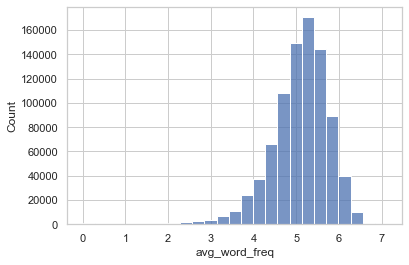

In [31]:
import seaborn as sns

sns.set_theme(style = 'whitegrid')

sns.histplot(x="avg_word_freq", bins = 25, data=NYT_all)